<a href="https://www.kaggle.com/code/ayushs9020/understanding-the-competition-bengalai?scriptVersionId=137102017" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Āmi tōmākē bhālōbāsi</p>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">
    
`Āmi tōmākē bhālōbāsi` means `I Love You` in $Bengali$
    
One interesting fact about Bengali Language. **Rabindranath Tagore, who wrote Jan Gan Man, National Antehm of India, was a Bengali Writer**
    
$Bengali$ is an $Indo-Aryan$ language spoken by over $220$ $Million$ people as a `first`/`second` language. It is the `official language` of $Bangladesh$ and one of the $22$ `Scheduled Languages` of $India$(my country $:)$). $Bengali$ is the `most widely` spoken language in $Bangladesh$, with over $100$ $Million$ speakers. It is also the `second-most widely` spoken `language` in $India$, after $Hindi$. $Bengali$ is written in the $Bengali$ $Script$, which is a $Brahmic$ $Script$. The $Bengali$ $Script$ is derived from the $Devanagari$ $Script$, but it has some `unique features`. $Bengali$ is a `tonal language`, which means that the `pitch of the voice` can `change the meaning of a word`. For example, the word `amar` can mean `my` or `not mine` depending on the `pitch of the voice`. $Bengali$ is a `rich` and `expressive language`. It has a `large vocabulary` and a `complex grammar`. $Bengali$ is also a very `musical language`, and it is often used in poetry and song.

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#ffff00 ; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #ffff00 ">1 | Goal ⚽️</p>

<div style="border-radius:10px; border:#ffff00  solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">
    
As it is written in the **[overview]()**, the error rate of $Google$ $Translator$ for $Bengali$ $Language$ is around $74$%, which is really huge. $Bengali.AI$, is hosting this competition to find better soltutions to the `translating system`, which will help in the communication between locals and tourists at many places.

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#800080; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #800080">2 | Advisory 📃</p>

<div style="border-radius:10px; border:#800080 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">
    
* The training data is huge, try to work on a smaller sample, to save resource and time. Once the pipeline is in the good condition, then send the whole data 
    
* Padd the sentences to the maximum length, to avoid any shape errors
    
* The total amount of files in the `train_mp3s` were found to be $9,63,636$ which takes around $3$ Hours to load with `Librosa`. I have decided to go with $5,354$ samples which is $0.005$% of the Original Data. This took me around $15$ Seconds to load.
* The length of all the audio files is the same which is $2,250$, denoting $2,250$, Seconds(I think so )

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#00FFFF; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #00FFFF">3 | Data 💡</p>

<div style="border-radius:10px; border:#00FFFF solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">
    
Lets dive into the data 

In [1]:
import pandas as pd
import seaborn as sns 
import tqdm
import matplotlib.pyplot as plt 
import librosa
import os

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<div style="border-radius:10px; border:#00FFFF solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

## $3.1$ $|$ $Train$
Our main training data is in the `train.csv` which is a `DataFrame` type object that contains $3$ columns
* $ID$ - This is the unique ID given to each sample. In many cases ID becomes useless, but here it is the connecting point between the training point and the target data
* $Sentences$ - This is the column that contains target data, which is in the sentence format
* $Train/Valid$ - The last column shows, which part of the sample is training data and which is the validation data. Though we can make our own splits, but I think the host has provided this information, because they had better splits, over the distribution of the data

In [2]:
train = pd.read_csv("/kaggle/input/bengaliai-speech/train.csv")
train.head()

,id,sentence,split
0,000005f3362c,ও বলেছে আপনার ঠিকানা!,train
1,00001dddd002,কোন মহান রাষ্ট্রের নাগরিক হতে চাও?,train
2,00001e0bc131,"আমি তোমার কষ্টটা বুঝছি, কিন্তু এটা সঠিক পথ না।",train
3,000024b3d810,নাচ শেষ হওয়ার পর সকলে শরীর ধুয়ে একসঙ্গে ভোজন...,train
4,000028220ab3,"হুমম, ওহ হেই, দেখো।",train


<div style="border-radius:10px; border:#00FFFF solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

## $3.2$ $|$ $Train_-mp3s$
    
This is a folder that contains our training samples. These are in audio files, and we wil thus use `Librosa` to read these files into array format

[-1.0249854e-13  1.4440472e-14 -3.2366571e-13 ... -1.9694657e-04
  4.4702338e-05  2.7131749e-04]


<Axes: >

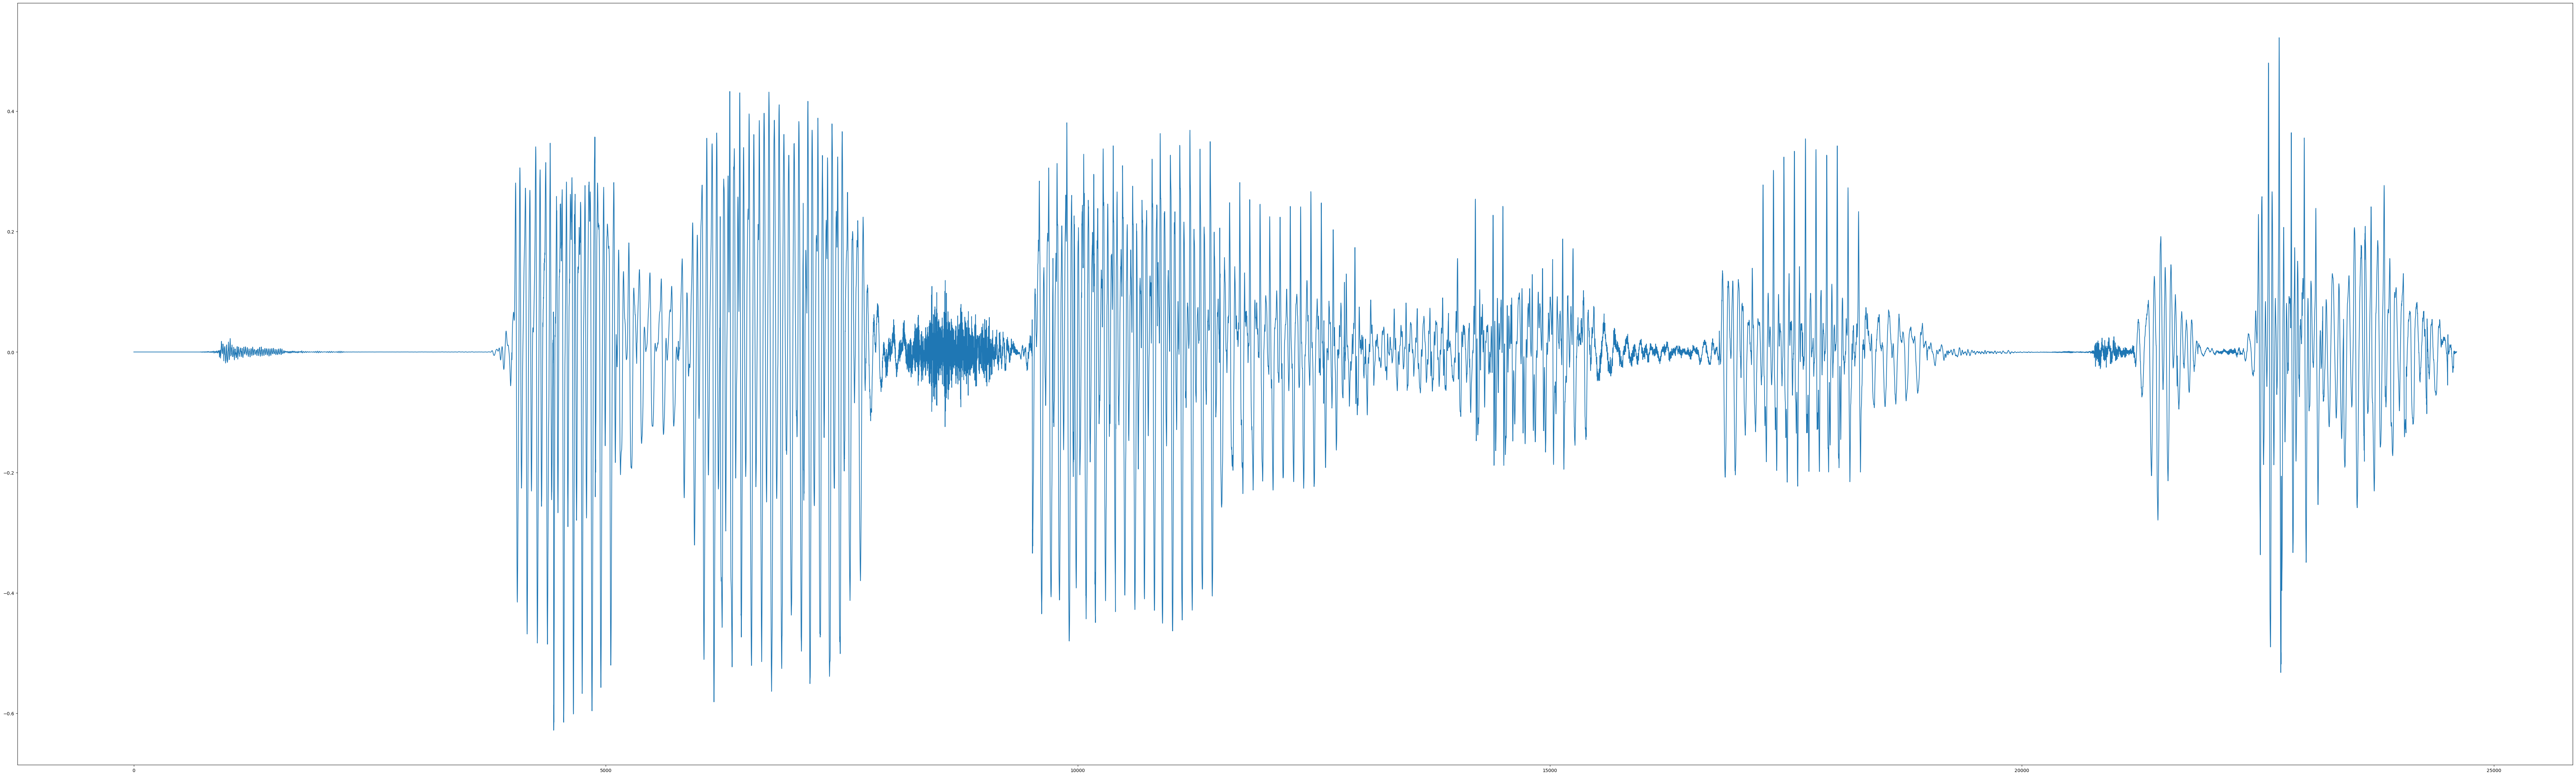

In [3]:
audio , _ = librosa.load('/kaggle/input/bengaliai-speech/train_mp3s/000005f3362c.mp3')
print(audio)
plt.figure(figsize = (100 , 30))
sns.lineplot(audio)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

Loading files can take a lot of time and thus I am limiting this to only the first $5354$ samples.


In [4]:
counter = 0
audio_list = []

for x in tqdm.tqdm(os.listdir("/kaggle/input/bengaliai-speech/train_mp3s") , total = 5354):
    
    audio , _ = librosa.load("/kaggle/input/bengaliai-speech/train_mp3s/" + x)
    audio_list.append(audio)
    
    counter += 1
    if counter == 5354:break

100%|█████████▉| 5353/5354 [01:26<00:00, 61.97it/s]


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#FFA500; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FFA500">4 | TO DO LIST 🗂️</p>

<div style="border-radius:10px; border:#FFA500 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

* $TO$ $DO$ $1$ $:$ $TOKENIZE$ $SENTENCES$
* $TO$ $DO$ $1$ $:$ $MAKE$ $DATALOADER$
* $TO$ $DO$ $1$ $:$ $MAKE$ $A$ $MODEL$
* $TO$ $DO$ $1$ $:$ $TRAIN$ $THE$ $MODEL$
* $TO$ $DO$ $1$ $:$ $IMPORVE$ $REUSLTS$
* $TO$ $DO$ $1$ $:$ $LESS$ $TRAINING$ $TIME$
* $TO$ $DO$ $1$ $:$ $DANCE$

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#FFC0CB; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FFC0CB">4 | TO DO LIST 🚀</p>

<div style="border-radius:10px; border:#FFC0CB solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

**THAT IT FOR TODAY GUYS**

**WE WILL GO DEEPER INTO THE DATA IN THE UPCOMING VERSIONS**

**PLEASE COMMENT YOUR THOUGHTS, HIHGLY APPRICIATED**

**DONT FORGET TO MAKE AN UPVOTE, IF YOU LIKED MY WORK $:)$**

<IMG SRC = "https://i.imgflip.com/19aadg.jpg">
    
**PEACE OUT $!!!$**